Zeit ist Geld - Warum Trading-Bots meistens Abzocke sind
========================================================

Mit Bitcoin kann man sowohl viel Zeit als auch Geld verschwenden - allerdings auch gewinnen. Ich sehe in meinen Traffic-Auswertungen, dass vor allem ein Artikel von mir viele Clicks von Google bekommt und das ist der Artikel [Arbitrage Bots - Wast ist das?](https://www.blockchain-investment.at/arbitrage-bots-was-ist-das/). Arbitrage-Bots bzw. Trading-Bots ganz allgemein, sind in mehr als 99,9% der Fällen pure Abzocke. Das tut meinem Herzen weh, da sich mein Artikel auf die technische Umsetzung und verwandte Artikel stürzt ohne die hohe Anzall an Betrügerseiten zu beleuchten. Zur Klarstellung: Ich bin als Moderator in einer FB-Gruppe rund um das Thema Kryptowährungen tätig und jedes Mal wenn jemand einen Artikel teilt, schaue ich mir den Artikel **und** die Website an und prüfe:

- Ist der Artikel inhaltlich glaubhaft und vermittelt entweder eine interessante Idee oder eine echte Neuigkeit?
- Macht die Seite (etwa über Affiliate-Links) Werbung für etwaige Scams?

Manchmal lehne ich Artikel ab, obwohl der Artikel für sich sinnvoll wäre weil auf der Seite für einen Trading-Bot Werbung gemacht wird der absurd hohe Rendite verspricht. Diese Rendite lassen sich nicht erwirtschaften. Warum weiß ich das?

Finanzmathematik und Statistik sind die Werkzeuge hinter vernünftigen Trading-Bots. Kursdaten sind auch zugänglich, daher kann man schon anfangen zu rechnen und zu prüfen welche Rendite überhaupt möglich waren.

Allerdings gilt die Regel: Wenn's funktioniert spricht wenig dafür dieses Wissen öffentlich - auch gegen einen Obolus - zugänglich zu machen. Man möchte ja **still und heimlich** davon profitieren und nicht zuviel Aufmerksamkeit der anderen Marktteilnehmer auf seine Strategien lenken.

Im folgenden Artikel möchte ich die Idee von Trading-Bots für Laien etwas verständlicher machen. Daher werde ich keine großen und komplizierten Modelle aufstellen sondern mich auf die absoluten Basics der Statistik beschränken und diese auf Preisdaten von Bitcoin anwenden. Mein Ziel ist es, dass dies jedem halbwegs verständlich ist der die vier Grundrechenarten beherrscht. Meine Daten des Bitcoin/USD-Kurses stammen von [Yahoo Finance Bitcoin USD](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD) und sind öffentlich zugänglich.

Zu aller erst werfen wir einen Blick auf die verfügbaren Daten. Sie sind im so genannten OpenHighLowClose-Format bzw. kurz auch OHLC-Format. Jede Zeile dieser Daten spiegelt den Kurszustand eines Tages wieder. Das ist das Standard-Format von Candle-Charts und gibt uns folgende vier Kennzahlen:

- **Open** bzw. der Kursstand als die Börsen öffneten
- **High** bzw. den Höchststand des Kurses (an diesem Tag)
- **Low** bzw. der Niedrigststand des Kurses (an diesem Tag)
- **Close** bzw. der Kursstand als die Börsen schlossen

In [109]:
import dash
import dash_table
import plotly.graph_objects as go
import pandas as pd

btc_data = pd.read_csv('BTC-USD.csv')
btc_data

Date         Open         High          Low        Close  \
0    2019-05-24  7881.695313  8140.719727  7824.448730  7987.371582   
1    2019-05-25  7991.885254  8117.925781  7965.976074  8052.543945   
2    2019-05-26  8055.206055  8687.520508  7924.670410  8673.215820   
3    2019-05-27  8674.072266  8907.174805  8668.705078  8805.778320   
4    2019-05-28  8802.757813  8807.016602  8634.721680  8719.961914   
..          ...          ...          ...          ...          ...   
362  2020-05-20  9725.329102  9804.793945  9447.201172  9522.981445   
363  2020-05-21  9522.740234  9555.242188  8869.930664  9081.761719   
364  2020-05-22  9080.334961  9232.936523  9008.638672  9182.577148   
365  2020-05-23  9185.062500  9302.501953  9118.108398  9209.287109   
366  2020-05-24  9196.930664  9287.927734  9165.896484  9198.138672   

       Adj Close       Volume  
0    7987.371582  25919126990  
1    8052.543945  22256813106  
2    8673.215820  26677970091  
3    8805.778320  27949839563  
4    8719.961914  24226919266  
..           ...          ...  
362  9522.981445  36546239702  
363  9081.761719  39326160532  
364  9182.577148  29810773699  
365  9209.287109  27727866812  
366  9198.138672  27337531392  

[367 rows x 7 columns]

## Simpler Trading Bot - Buy and hold

Wir sehen also die OHLC-Daten sowie das dazugehörige Datum und das Handelsvolumen an diesen Tagen. Bei Programmen gilt die Faustregel, dass umso komplexer und aufwendiger die Programmlogik, umso höher die Wahrscheinlichkeit, dass man Bugs einbaut. Was ist die simpelste Logik für einen Trading-Bot? Hodl natürlich! Das führt mich gleich zur ersten Frage: Nehmen wir an ich kaufe an einem beliebigen Tag im letzten Jahr und halte einfach die Coins. Hätte ich damit einen Verlust gemacht?

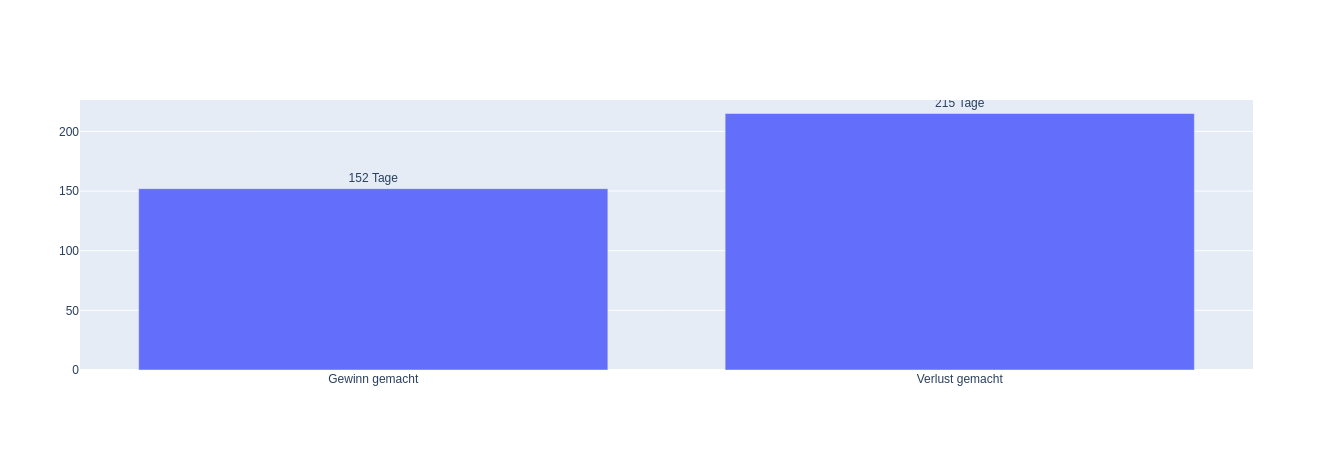

Günstig gekauft und Gewinn gemacht: 152 Tage
Teuer gekauft und Verlust gemacht: 215 Tage


In [79]:
latest_price = btc_data.tail(1)['Close'].values[0]
winners = 0
losers = 0

for idx, row in btc_data.iterrows():
    cur_price = row['Close']
    
    if cur_price > latest_price:
        winners += 1
    else:
        losers += 1
        
winners_losers_fig = go.Figure(data = go.Bar(x = ['Gewinn gemacht', 'Verlust gemacht'], y=[ winners, losers ], text='pop'))
winners_losers_fig.update_traces(texttemplate='%{value} Tage', textposition='outside')
winners_losers_fig.show()

print('Günstig gekauft und Gewinn gemacht: {0} Tage'.format(winners))
print('Teuer gekauft und Verlust gemacht: {0} Tage'.format(losers))

Aus den Zahlen ist bereits ersichtlich: Hodl auf ein Jahr beschränkt, bedeutet bei einem einmaligen Kauf häufiger Nieten zu ziehen als Gewinnerlose. Die Wahrscheinlichkeit ein Gewinnerlos zu ziehen ergibt sich aus der Anzahl der Gewinnerlose durch die Gesamtanzahl aller Lose (inkl. der Verliererlose):

In [32]:
hodl_win_prob = winners / (losers + winners)

print("Wahrscheinlichkeit günstig zu kaufen: %.2f" % (hodl_win_prob * 100) + '%')

Wahrscheinlichkeit günstig zu kaufen: 41.42%


## Sparplan automatisiert - Trading-Bot für Sparplan rentabel?

Hodl als Taktik neigt bei Einmalkäufen zu einer relativ hohen Chance daneben zu liegen und ist damit nicht für einen Trading-Bot geeignet. Die Steigerung von Einmalkauf und Hodl ist ein Sparplan der regelmäßig nachkauft. Nehmen wir also an, wir würden für 50 USD immer am Monatsersten nachkaufen. Würden wir Gewinn oder Verlust machen? Um hier gleich den Worst-Case abzudecken wird jeweils zum **High** des jeweiligen Tages gekauft. Da unsere Daten vom 22. an starten, wird jeder 22. Tag des Monats als Stichtag hergenommen. Der schlussendliche Wert der durch unseren Sparplan gekauften BTC wird am **Low** des letzten Tages gemessen.

In [56]:
sell_price = btc_data.tail(1)['Low'].values[0]

spent_usd = 0
bought_btc = 0

for idx, row in btc_data.iterrows():
    date = row['Date']
    
    if (date.endswith('-22')):
        spent_usd += 50
        btc_price = row['High']
        bought_btc += (50 / btc_price)
        
bought_btc_in_usd = bought_btc * sell_price
profit_rate = (bought_btc_in_usd / spent_usd * 100) - 100

print('Es wurden {0} BTC um {1} USD gekauft. Das entspricht dem Gegenwert von {2} USD'.format(bought_btc, spent_usd, bought_btc_in_usd))
print("Relativ gesehen, entspricht das einem Profit von %.2f%%" % profit_rate)

Es wurden 0.06931390582785103 BTC um 600 USD gekauft. Das entspricht dem Gegenwert von 635.3240857198069 USD
Relativ gesehen, entspricht das einem Profit von 5.89%


Ein theoretischer Profit von **5.89%** ist keine bahnbrechende Errungenschaft. Allerdings bedeutet dies, dass die Inflation geschlagen ist und der Wert des Geldes zumindestens erhalten bleibt. Diese Taktik - so simpel sie ist - erlaubt uns dank [Cost-Average-Effekt](https://www.investopedia.com/terms/d/dollarcostaveraging.asp) einen respektablen Profit zu erwirtschaften.

Aber ginge das besser wenn der Tag im Monat ein anderer ist? Statt dem 22. zB. der 1.?

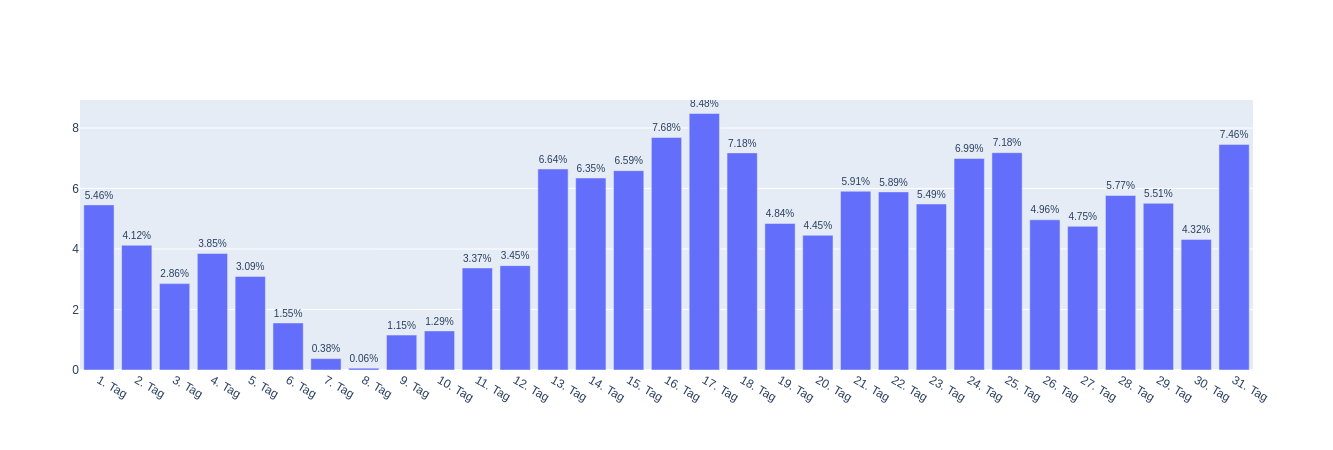

In [77]:
def calculate_profit_for_buy_day(date_token):
    sell_price = btc_data.tail(1)['Low'].values[0]
    spent_usd = 0
    bought_btc = 0

    for idx, row in btc_data.iterrows():
        date = row['Date']

        if (date.endswith(date_token)):
            spent_usd += 50
            btc_price = row['High']
            bought_btc += (50 / btc_price)

    bought_btc_in_usd = bought_btc * sell_price
    profit_rate = (bought_btc_in_usd / spent_usd * 100) - 100
    
    return [ date_token, profit_rate, spent_usd, bought_btc, bought_btc_in_usd ]

savings_plan = []
labels = []

for day in range(1, 32):
    date_token = '0{0}'.format(day)
    labels.append('{0}. Tag'.format(day))
    
    if (day > 9):
        date_token = '{0}'.format(day)
        
    savings_plan.append(calculate_profit_for_buy_day(date_token))
    
performances = [ x[1] for x in savings_plan ]

performance_of_savings_plan_fig = go.Figure(data = go.Bar(x = labels, text='pop', y=performances))
performance_of_savings_plan_fig.update_traces(texttemplate='%{value:.2f}%', textposition='outside')
performance_of_savings_plan_fig.show()

Das spannende an dem Ergebnis ist, dass es für den simplen Sparplan im letzten Jahr nicht eine Variante gab, an der man einen Verlust gemacht hätte. Die Kalkulation passiert allerdings schon unter verschärften Bedingungen, da die Kalkulation darauf basiert, dass man immer zum Höchsstand des jeweiligen Tages kauft und am Niedrigsstand des Stichtags (24. Mai 2020) verkauft hätte.

Anhand des Graphs lässt sich allerdings schon eines feststellen: Die ersten 14 Tage des Monats sind denkbar schlechte Tage um einzukaufen. Etwa Mitte des Monats sind lt. der vergangenen Daten die besten Tage um zu kaufen. Bedeutet das, dass ein Bot der immer am 17. des Monats kauft den meisten Profit machen wird nächstes Jahr? **Nein!** Das ist ein Trugschluss, da man nicht die vergangenen Marktdaten hernehmen kann um die Zukunft zu erschließen.

Rein psychologisch betrachtet würde es aber Sinn machen, nicht erst am 7. Tag - wenn jeder seinen Gehalt hat und sich erinnert mal wieder ein paar Milli-Bitcoin zu kaufen - den Weg auf den Exchange findet...

## Möglicher Profit? Daten muss man erkunden

Was ist überhaupt möglich? Die Frage ist relativ einfach zu beantworten. In der besten aller Welten kauft man zum allergünstigsten Moment ein und verkauft ebenfalls zu dem Zeitpunkt an dem man am meisten dafür bekommt.



In [4]:
min_price = btc_data.head(1)['Low'].values[0]
max_price = btc_data.head(1)['High'].values[0]

number_of_rows = len(btc_data)
possible_profits = []

# We've got to iterate over all days as potential buy date. If we just assumed the lowest price and the highest price
# for calculation, we would ignore the issue that the lowest price might occur after the highest price.
# So I'm gonna use a O(n^2) algorithmn to prevent this
for idx, cur_row in btc_data.iterrows():
    cur_buy_price = cur_row['Low']
    cur_sell_price = cur_row['High']
    
    for _, row in btc_data.tail(number_of_rows - idx - 1).iterrows():
        cur_sell_price = max(cur_sell_price, row['High'])
        
    possible_profits.append(cur_sell_price / cur_buy_price * 100)
    
possible_profit = max(possible_profits)

print("Der höchstmögliche Profit der erzielt werden kann beträgt %.2f%%" % possible_profit)

Der höchstmögliche Profit der erzielt werden kann beträgt 243.41%


Ein Profit von **243,41%** ist schon *recht* ordentlich aber solche Rendite erzielen wenn man alle Daten hat, ist einfach. Schwieriger wird es, wenn man sich Gedanken macht wie man die existierenden Daten bewertet um Entscheidungen zu treffen und Geld zu riskieren.

## Trading-Bots - Überirdische Performance ist unmöglich

Die vorhergehenden Auswertungen geben uns den groben Rahmen vor. Mit *perfektem Wissen(!)* ist ein Profit von 243,41% möglich. Gott, als allwissendes Wesen, kann also sein Geld nur etwas mehr als verdreifachen mit diesem Bitcoin-Handel. Da gängige Trading-Bots nur von einfachen Sündern geschrieben werden, können wir Gottes Performance als absolute Obergrenze annehmen.

Dies sollte man *immer* im Hinterkopf behalten wenn jemand bestimmte mögliche Profite vorrechnet. Einfach den Taschenrechner zücken und nachrechnen ob hier jemand übergöttliche Profite verspricht. Denn ohne zusätzliches Risiko, zB. durch [Hebel](https://de.wikipedia.org/wiki/Leverage-Effekt) oder Marktmanipulation, ist es rechnerisch unmöglich den perfekten Trade zu schlagen.

## Mechanische Kaufentscheidungen - Eine Beispielstrategie

Nachdem die Obergrenze klar ist, geht es daran herauszufinden wie man so einen Robo-Trader programmieren könnte. Das folgende Beispiel nimmt echte Daten her und entwirft eine simple Strategie. Am Ende berechnen wir noch wie gut sie performen würde. **Achtung:** Vergangene Daten geben keine Garantie ab auf zukünftige Gewinne bzw. Verluste.

Bevor wir aber in die Zukunft schauen, schauen wir uns die Vergangenheit an. Ich persönlich wollte als erstes wissen wie lange Ab- bzw. Aufwärtsbewegungen dauern.

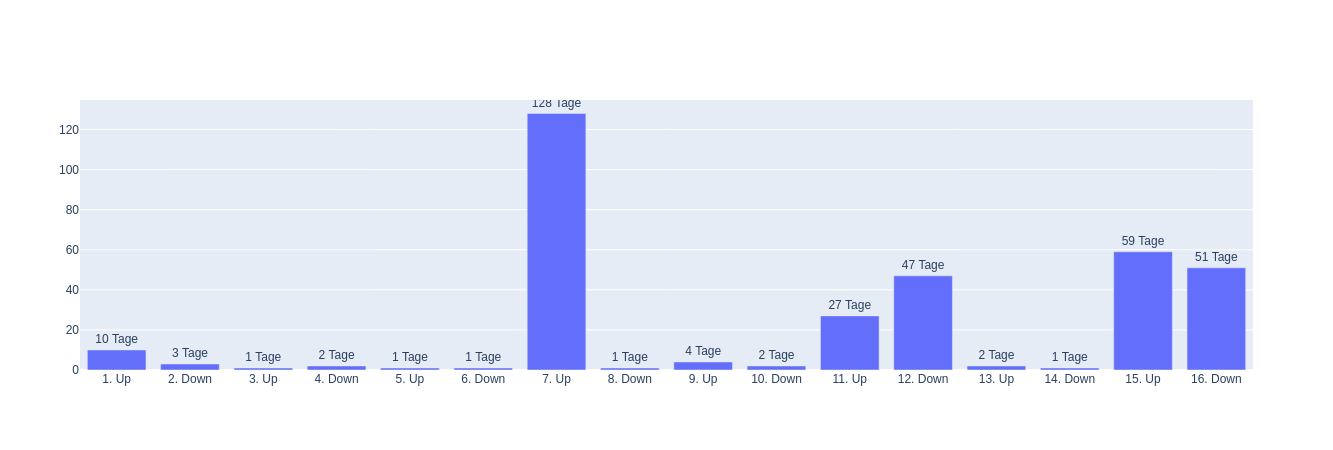

In [76]:
increase_streaks = []
decrease_streaks = []

last_close = btc_data.head(1)['Close'].values[0]

chart_movement = []

for idx, row in btc_data.tail(number_of_rows - 1).iterrows():
    cur_close = row['Close']
    direction = 'Up'
    
    if cur_close < last_close:
        direction = 'Down'
        
    chart_movement.append(direction)
    
count = 1
values = []
labels = []

last_label = chart_movement[0]
labels.append(last_label)

for label in chart_movement[1:]:
    if last_label == label:
        count += 1
    else:
        values.append(count)
        count = 1
        labels.append(label)
        last_label = label

movement_fig_labels = [ '{0}. {1}'.format(idx + 1, direction) for (idx, direction) in enumerate(labels) ]
movement_fig = go.Figure(data = go.Bar(x = movement_fig_labels, text='pop', y=values))
movement_fig.update_traces(texttemplate='%{value} Tage', textposition='outside')
movement_fig.show()


Der Graph zeigt an wie lange die Aufwärts (Up) bzw. Abwärtsbewegung (Down) in Tagen dauert.. Allerdings sagt das noch nicht viel aus. Wie sehr verändert sich des Bitcoin-Preises wenn sich der Chart rauf bzw. runter bewegt?

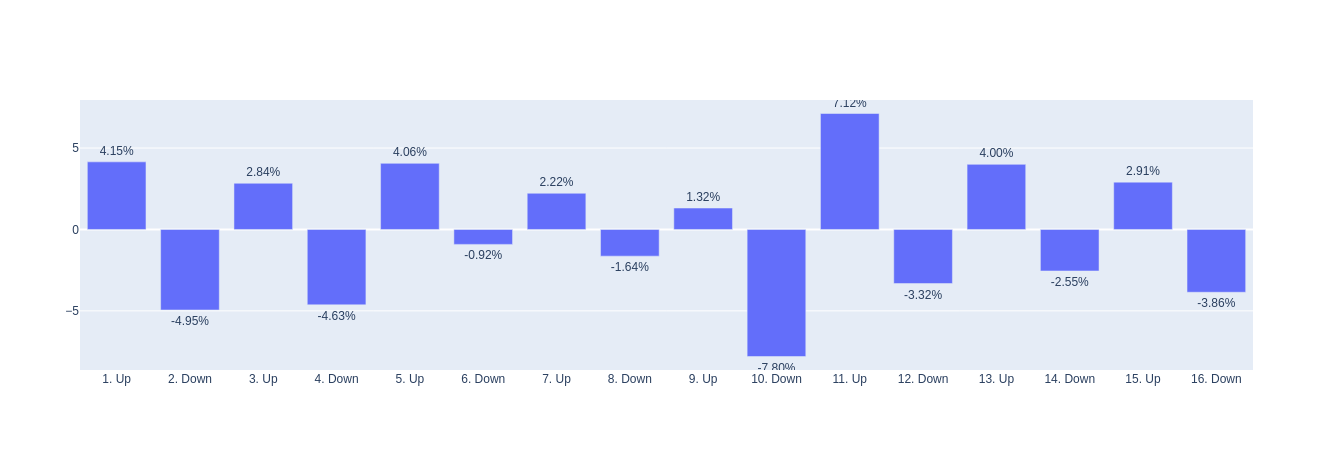

In [72]:
idx = values[0]
close_values = btc_data['Close'].values

relative_changes = []
absolute_changes = []
previous_value = btc_data['Open'].values[0]
previous_idx = 0


for idx, value in enumerate(values):
    if idx > 0:
        previous_idx = sum(values[0:idx])
        previous_value = close_values[previous_idx]
        
    cur_value  = close_values[sum(values[0:idx + 1])]
    loss_marker = 1
    
    if cur_value < previous_value:
        loss_marker = -1

    absolute_changes.append(cur_value - previous_value)
    relative_changes.append(((max(previous_value, cur_value) / min(previous_value, cur_value) * 100)  - 100) * loss_marker)
    
relative_changes_fig = go.Figure(data = go.Bar(x = movement_fig_labels, text='pop', y=relative_changes))
relative_changes_fig.update_traces(texttemplate='%{value:.2f}%', textposition='outside')
relative_changes_fig.show()
    

Aus den Daten ergibt sich auf den ersten Blick, dass die Härte des Absturzes bzw. Höhe des Gewinns und die Dauer einer solchen Periode nicht direkt miteinander verbunden sind. Um die Logik für dieses Beispiel möglichst simpel zu halten, nehme ich die Daten her und überlege mir eine simple Strategie, die - zumindestens auf den ersten Blick - funktionieren könnte:

- Wenn eine Abwärtsperiode länger als 5 Tage dauert wird verkauft
- Wenn ein Aufschwung min. 2 Tage gedauert hat, wird gekauft

Diese Strategie führt dazu, dass der Bot tagelang nichts tun wird und einfach nur die Charts beobachtet. Daher taufe ich diese Strategie "Die Faultierstrategie"

## Faultier-Trading - Wie gut performt es?

Nachdem die erste echte Trading-Strategie ausgearbeitet ist, geht es ans Messen der Performance. Dazu werden wieder die historischen Daten hergenommen. Stichtag ist der erste Tag der Daten. Um die Performance unter den schlechtmöglichsten Bedingungen zu testen, werden weiters folgende Annahmen gemacht:

- Gekauft wird immer zum Tageshöchstpreis
- Verkauft wird immer beim Tiefstand des Tagespreises

Gestartet wird die Simulation mit 2.000 USD und es wird am ersten Tag sofort um 1.000 USD gekauft. Dies ergibt folgende Trading-Historie:



In [120]:
# columns: Date, Type, Before USD, After USD, Before BTC, After BTC
trades = []
amount_usd = 1000
amount_btc = amount_usd / btc_data['High'].values[0] 

previous_btc_price = btc_data['High'].values[0]

trades.append([ btc_data['Date'].values[0], 'Buy', amount_usd + amount_usd, amount_usd, 0, amount_usd / btc_data['High'].values[0] ])
number_of_downwards_days = 0
number_of_upwards_days = 0
amount_usd = 1000

should_sell = False
should_buy = False

for _, row in btc_data.tail(number_of_rows - 1).iterrows():
    before_usd = amount_usd
    before_btc = amount_btc
    
    if should_sell and amount_btc > 0:
        amount_usd = row['Low'] * amount_btc
        amount_btc = 0
        should_sell = False
        previous_btc_price = row['Low']
        trades.append([ row['Date'], 'Sell', before_usd, amount_usd, before_btc, amount_btc ])
        
    if should_buy and amount_usd > 0:
        amount_btc = amount_btc + amount_usd / row['High']
        amount_usd = 0
        should_buy = False
        previous_btc_price = row['High']
        trades.append([ row['Date'], 'Buy', before_usd, amount_usd, before_btc, amount_btc ])
    
    cur_price = row['Close']
    
    if cur_price < previous_btc_price:
        number_of_downwards_days += 1
        number_of_upwards_days = 0
    else:
        number_of_downwards_days = 0
        number_of_upwards_days += 1
        
    if number_of_upwards_days > 2:
        should_buy = True
        
    if number_of_downwards_days > 5:
        should_sell = True
        
    previous_btc_price = cur_price

trading_history = pd.DataFrame(trades, columns = [ 'Datum', 'Typ', 'USD vor Trade', 'USD nach Trade', 'BTC vor Trade', 'BTC nach Trade' ])
trading_history



Datum   Typ  USD vor Trade  USD nach Trade  BTC vor Trade  \
0  2019-05-24   Buy    2000.000000     1000.000000       0.000000   
1  2019-06-15   Buy    1000.000000        0.000000       0.122839   
2  2019-09-19  Sell       0.000000     2322.213236       0.235717   
3  2019-09-19   Buy       0.000000        0.000000       0.235717   
4  2019-09-20  Sell       0.000000     2285.339377       0.225552   
5  2019-10-03   Buy    2285.339377        0.000000       0.000000   
6  2020-03-01  Sell       0.000000     2300.816837       0.271604   
7  2020-03-01   Buy       0.000000        0.000000       0.271604   
8  2020-03-02  Sell       0.000000     2249.625037       0.263650   
9  2020-03-20   Buy    2249.625037        0.000000       0.000000   

   BTC nach Trade  
0        0.122839  
1        0.235717  
2        0.000000  
3        0.225552  
4        0.000000  
5        0.271604  
6        0.000000  
7        0.263650  
8        0.000000  
9        0.328688

Am Ende der Laufzeit ist also nicht 0 da. Was würde dies also am Ende der Laufzeit bzw. der verfügbaren Daten ergeben?

In [121]:
sell_price = btc_data.tail(1)['Low'].values[0]
overall_amount_usd = amount_usd + (amount_btc * sell_price)

print('Nach Ablauf der Zeit wären USD und BTC im Wert von %.2f auf dem Wallet bzw. Konto' % overall_amount_usd)

Nach Ablauf der Zeit wären USD und BTC im Wert von 3012.72 auf dem Wallet bzw. Konto


Zu meiner großen Überraschung würde diese simple Strategie eine Rendite von über 50% abwerfen. Aber 

## Conclusio

Wer bis hierhin gekommen ist, nimmt hoffentlich folgende Punkte mit:

- Trading-Bots programmieren ist keine hohe Kunst
- Gut performende Trading-Bots programmieren ist schwer und wer es schafft, wird sich hüten sein Geheimnis preis zu geben
- Die perfekten Trades von Gott schlägst du nicht. Wer dir das verspricht will dich nur abzocken